In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.status()

  Activating project at `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis`


Status `~/Documents/Carnegie-Mellon/Chatterjee Group/Programming/heisenberg-model/Biquadratic.jl/analysis/Project.toml`
⌃ [13f3f980] CairoMakie v0.15.4
  [780c37f4] Carlo v0.2.5
⌃ [a93c6f00] DataFrames v1.7.0
  [f67ccb44] HDF5 v0.17.2
⌃ [033835bb] JLD2 v0.5.15
  [ebeed567] PeriodicArrays v0.1.0 `../../../PeriodicArrays.jl#main`
  [90137ffa] StaticArrays v1.9.14
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [2]:
using CairoMakie
using Carlo.ResultTools
using DataFrames
using HDF5
using JLD2
using LinearAlgebra
using PeriodicArrays
using StaticArrays

In [3]:
# Parse DataFrame from ResultTools into more readily useable form
cleandata(filepath::AbstractString) = select(
    DataFrame(ResultTools.dataframe(filepath)),
    [:T, :K, :Lx, :Ly, :Mag, :Energy, :Dxπ, :Dyπ, :P, :J_s],
)

cleandata (generic function with 1 method)

In [4]:
function generatePlot(data::AbstractDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false, label="")
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    vals = getfield.(data[:, y], :val)
    errs = getfield.(data[:, y], :err)
    scatter!(data[:, x], vals; label)
    if line
        lines!(data[:, x], vals)
    end
    errorbars!(data[:, x], vals, errs)

    return fig
end

function generatePlot(data::GroupedDataFrame, x, y; fig=Figure(), fig_pos=(1,1),
                      title, xlabel, ylabel, line=false)
    fig[fig_pos...] = Axis(fig; title, xlabel, ylabel)

    for key in keys(data)
        group = data[key]
        vals = getfield.(group[:, y], :val)
        errs = getfield.(group[:, y], :err)
        scatter!(group[:, x], vals, label="$(NamedTuple(key))")
        if line
            lines!(group[:, x], vals)
        end
        errorbars!(group[:, x], vals, errs)
    end

    axislegend()

    return fig
end

generatePlot (generic function with 2 methods)

In [18]:
jobname = "large-sys"
data = groupby(cleandata("../jobs/" * jobname * ".results.json"), :K)

Row,T,K,Lx,Ly,Mag,Energy,Dxπ,Dyπ,P,J_s
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…
1,0.05,-0.005,120,120,0.0011307±4.2e-6,-1.95464±8.7e-6,0.93725±0.00051,0.93722±0.00051,0.0223±0.0011,0.0234±0.0011
2,0.1,-0.005,120,120,0.0016788±4.0e-6,-1.90129±9.2e-5,0.414±0.01,0.414±0.01,0.086±0.012,0.106±0.013
3,0.15,-0.005,120,120,0.0020729±4.6e-6,-1.85101±8.4e-5,0.0465±0.0043,0.0465±0.0043,0.179±0.016,0.688±0.01
4,0.2,-0.005,120,120,0.0023916±5.2e-6,-1.79802±3.0e-5,0.1346±0.007,0.1346±0.007,0.202±0.017,0.354±0.014
5,0.25,-0.005,120,120,0.0026849±3.1e-6,-1.74492±2.4e-5,0.1121±0.009,0.1121±0.009,0.442±0.016,0.4909±0.008
6,0.3,-0.005,120,120,0.0029474±4.5e-6,-1.69048±9.9e-5,0.0801±0.0071,0.0801±0.0071,0.345±0.018,0.484±0.016
7,0.35,-0.005,120,120,0.0032078±3.4e-6,-1.63517±3.3e-5,0.0407±0.0015,0.0407±0.0015,0.428±0.017,0.5244±0.0025
8,0.4,-0.005,120,120,0.0034434±6.1e-6,-1.57756±3.6e-5,0.0401±0.0011,0.0401±0.0011,0.367±0.016,0.4582±0.0026
9,0.45,-0.005,120,120,0.0036724±4.5e-6,-1.51796±4.6e-5,0.0409±0.0013,0.0409±0.0013,0.283±0.02,0.3891±0.0047


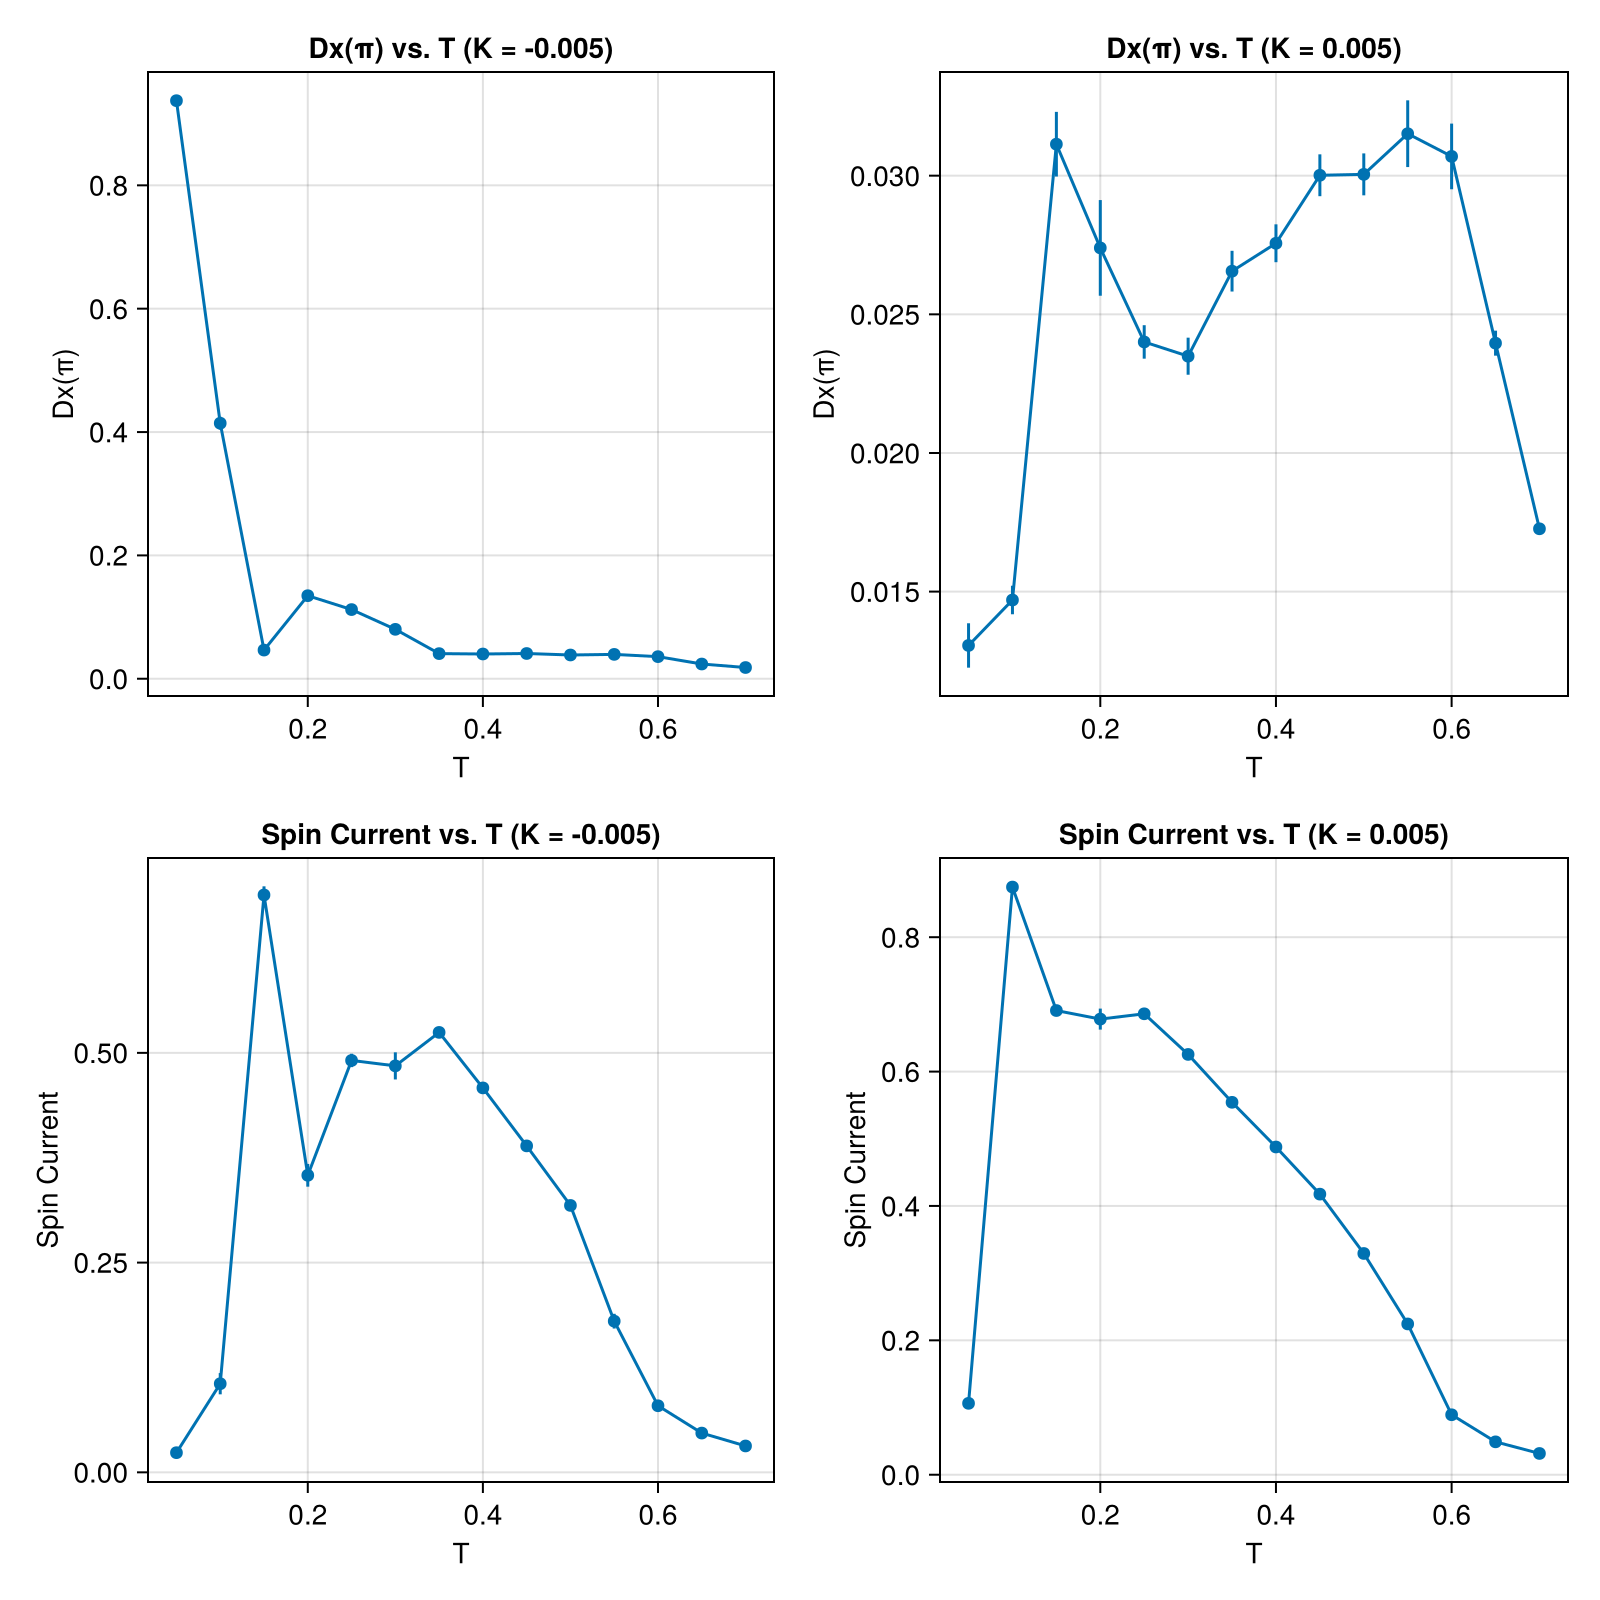

In [32]:
fig = Figure(size=(800, 800))

generatePlot(
    data[1], :T, :Dxπ; fig,
    title="Dx(π) vs. T (K = -0.005)",
    xlabel="T",
    ylabel="Dx(π)",
    line=true
)
generatePlot(
    data[2], :T, :Dxπ; fig, fig_pos=(1,2),
    title="Dx(π) vs. T (K = 0.005)",
    xlabel="T",
    ylabel="Dx(π)",
    line=true
)

generatePlot(
    data[1], :T, :J_s; fig, fig_pos=(2,1),
    title="Spin Current vs. T (K = -0.005)",
    xlabel="T",
    ylabel="Spin Current",
    line=true
)
generatePlot(
    data[2], :T, :J_s; fig, fig_pos=(2,2),
    title="Spin Current vs. T (K = 0.005)",
    xlabel="T",
    ylabel="Spin Current",
    line=true
)

save("temp-sweep-plots/Dx-P-plots.png", fig)
fig

In [7]:
ungrouped_data = cleandata("../jobs/$jobname.results.json")

Row,T,K,Lx,Ly,Mag,Energy,Dxπ,Dyπ,P,J_s
,Float64,Float64,Int64,Int64,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…,Measurem…
1,0.05,-0.005,120,120,0.0011307±4.2e-6,-1.95464±8.7e-6,0.93725±0.00051,0.93722±0.00051,0.0223±0.0011,0.0234±0.0011
2,0.1,-0.005,120,120,0.0016788±4.0e-6,-1.90129±9.2e-5,0.414±0.01,0.414±0.01,0.086±0.012,0.106±0.013
3,0.15,-0.005,120,120,0.0020729±4.6e-6,-1.85101±8.4e-5,0.0465±0.0043,0.0465±0.0043,0.179±0.016,0.688±0.01
4,0.2,-0.005,120,120,0.0023916±5.2e-6,-1.79802±3.0e-5,0.1346±0.007,0.1346±0.007,0.202±0.017,0.354±0.014
5,0.25,-0.005,120,120,0.0026849±3.1e-6,-1.74492±2.4e-5,0.1121±0.009,0.1121±0.009,0.442±0.016,0.4909±0.008
6,0.3,-0.005,120,120,0.0029474±4.5e-6,-1.69048±9.9e-5,0.0801±0.0071,0.0801±0.0071,0.345±0.018,0.484±0.016
7,0.35,-0.005,120,120,0.0032078±3.4e-6,-1.63517±3.3e-5,0.0407±0.0015,0.0407±0.0015,0.428±0.017,0.5244±0.0025
8,0.4,-0.005,120,120,0.0034434±6.1e-6,-1.57756±3.6e-5,0.0401±0.0011,0.0401±0.0011,0.367±0.016,0.4582±0.0026
9,0.45,-0.005,120,120,0.0036724±4.5e-6,-1.51796±4.6e-5,0.0409±0.0013,0.0409±0.0013,0.283±0.02,0.3891±0.0047


In [8]:
function generate_mctime_plot(task_no::Int)
    fig = Figure(size=(800, 400))

    ax_P = fig[1,1] = Axis(
        fig,
        title="P vs. Bin #",
        xlabel="Bin #",
        ylabel="P",
        xminorticksvisible=true
    )
    ax_Dxπ = fig[1,2] = Axis(
        fig,
        title="Dx(π) vs. Bin #",
        xlabel="Bin #",
        ylabel="Dx(π)",
        xminorticksvisible=true
    )

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.meas.h5") do file
        observables = file["observables"]

        P_samples = read(observables, "P/samples")
        n = length(P_samples)
        init = 1
        lines!(
            ax_P,
            collect(init:n),
            P_samples[init:n],
            label="P"
        )
        Js_samples = read(observables, "J_s/samples")
        lines!(
            ax_P,
            collect(init:n),
            Js_samples[init:n],
            label="Spin Current"
        )
        axislegend(ax_P, position=:rb)

        Dxπ_samples = read(observables, "Dxπ/samples")
        lines!(
            ax_Dxπ,
            collect(init:n),
            Dxπ_samples[init:n],
        )
    end

    return fig
end

generate_mctime_plot (generic function with 1 method)

DataFrameRow
 Row │ T        K        Lx     Ly     Mag               Energy           Dxπ           Dyπ           P            J_s         
     │ Float64  Float64  Int64  Int64  Measurem…         Measurem…        Measurem…     Measurem…     Measurem…    Measurem…   
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   4 │     0.2   -0.005    120    120  0.0023916±5.2e-6  -1.79802±3.0e-5  0.1346±0.007  0.1346±0.007  0.202±0.017  0.354±0.014

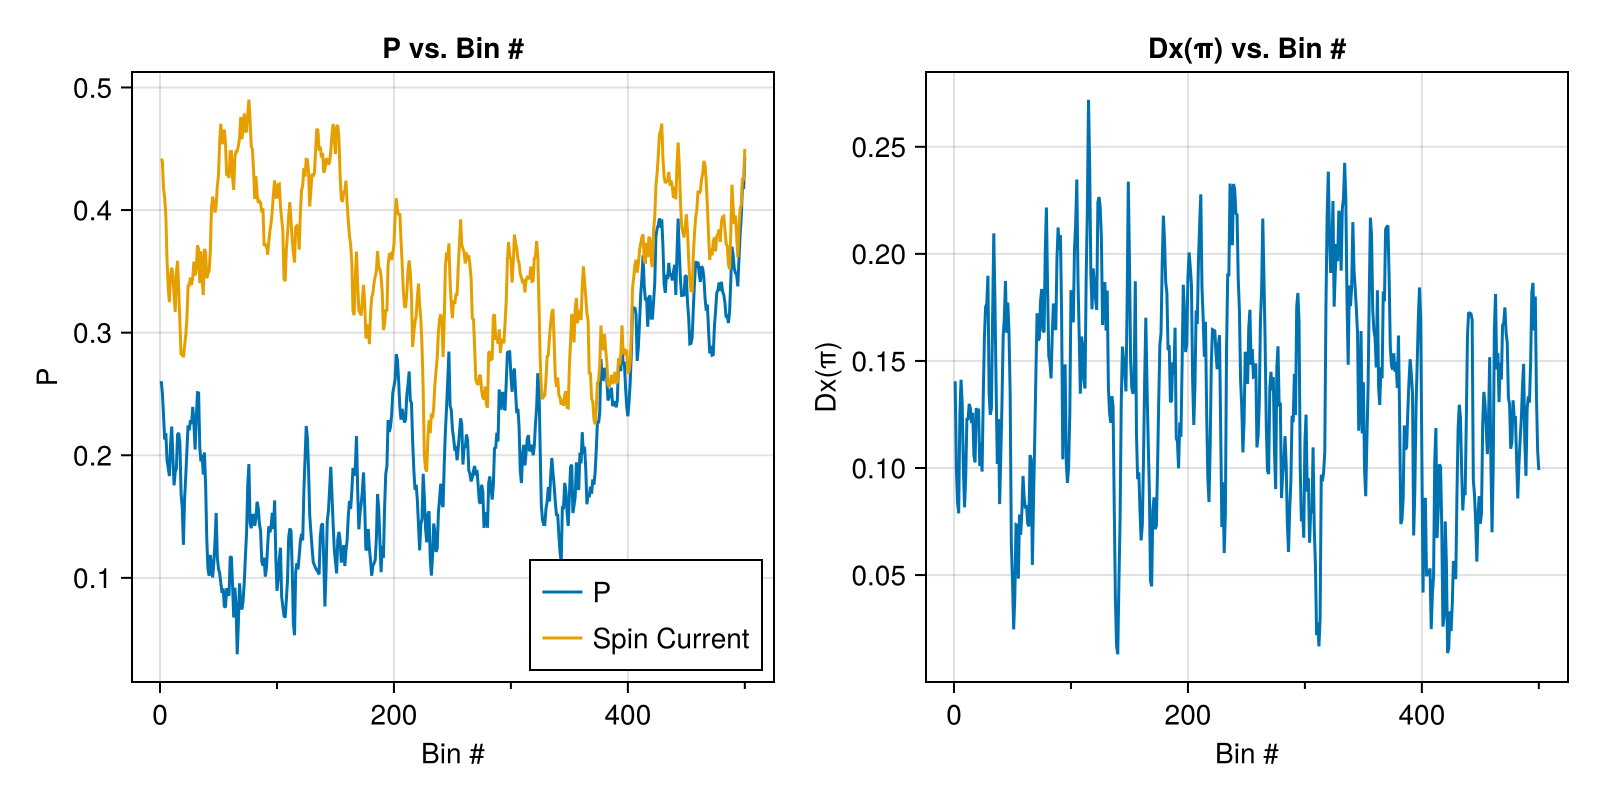

In [31]:
i = 4
print(ungrouped_data[i, :])
generate_mctime_plot(i)

In [10]:
function generate_spins(task_no::Int)
    fig = Figure(size=(600, 600))

    task_str = lpad(task_no, 4, "0")
    h5open("../jobs/$jobname.data/task$task_str/run0001.dump.h5") do file
        spins = map(
            t -> [t[:data][1], t[:data][2], t[:data][3]],
            read(file, "simulation/spins")
        )
        spin_xs = map(v -> v[1], spins)
        spin_ys = map(v -> v[2], spins)
        spin_zs = map(v -> v[3], spins)
        Lx, Ly = size(spins)

        fig[1,1] = Axis(fig; title="Spins", backgroundcolor="black")
        strength = vec(spin_zs)
        arrows2d!(1:Lx, 1:Ly, spin_xs, spin_ys, lengthscale=0.5, align=:center, color=strength)
    end

    return fig
end

generate_spins (generic function with 1 method)

DataFrameRow
 Row │ T        K        Lx     Ly     Mag               Energy           Dxπ             Dyπ             P              J_s           
     │ Float64  Float64  Int64  Int64  Measurem…         Measurem…        Measurem…       Measurem…       Measurem…      Measurem…     
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  15 │    0.05    0.005    120    120  0.0011893±5.6e-6  -1.95199±9.3e-6  0.01306±0.0008  0.01306±0.0008  0.1043±0.0033  0.1062±0.0033
0.05911796782617524
-0.047897104480586775


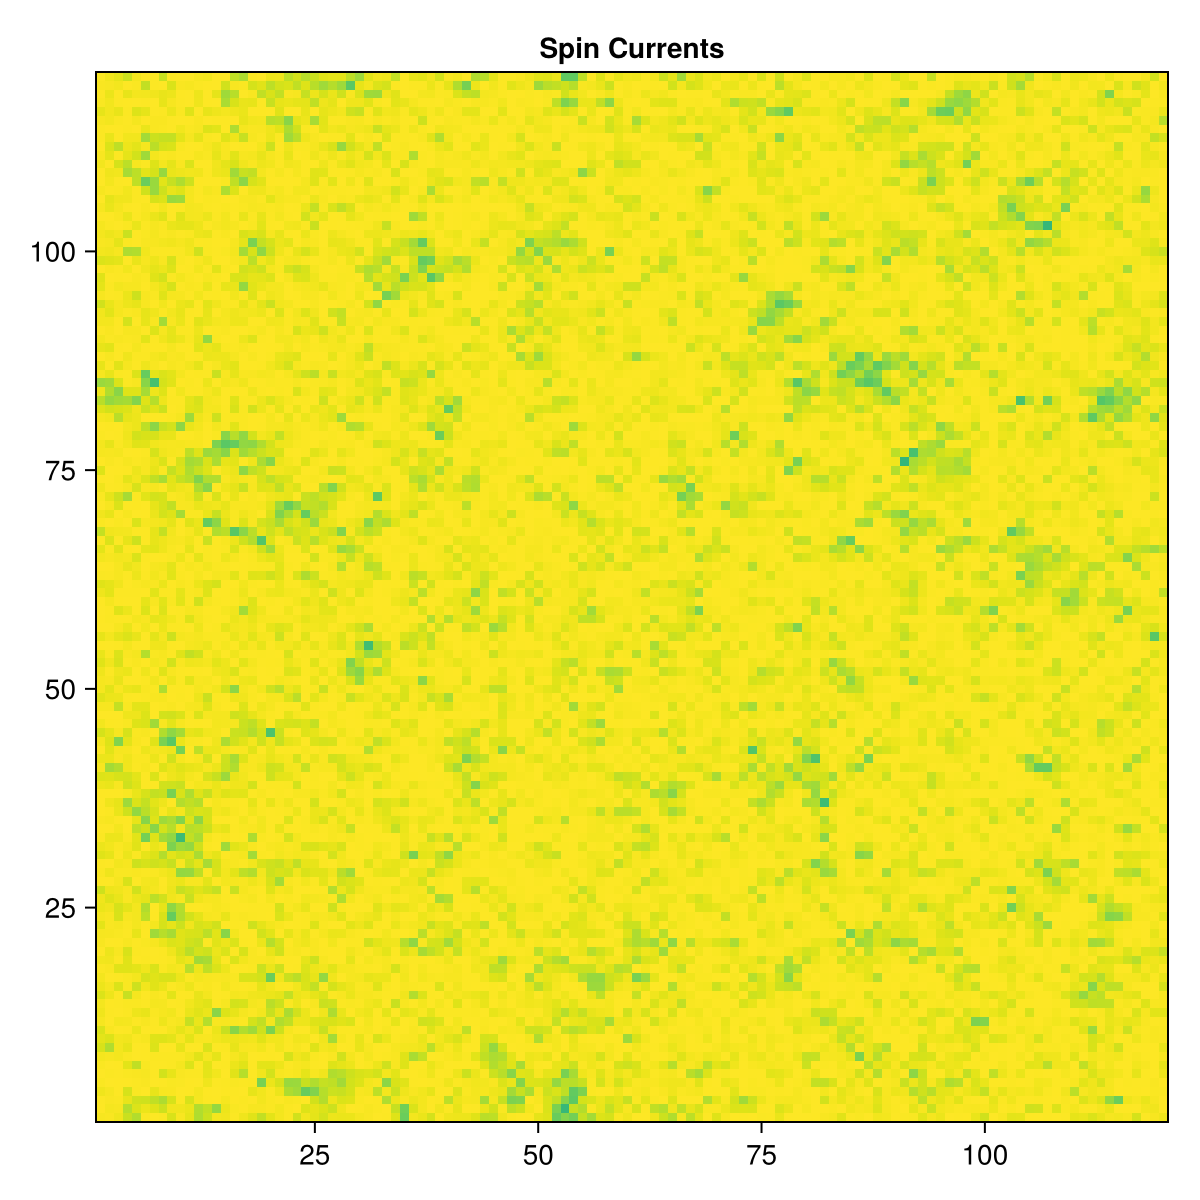

In [29]:
i = 15
println(ungrouped_data[i, :])
task_str = lpad(i, 4, "0")

fig = Figure(size=(600, 600))
h5open("../jobs/$jobname.data/task$task_str/run0001.dump.h5") do file
    spins = PeriodicArray(map(
        t -> [t[:data][1], t[:data][2], t[:data][3]],
        read(file, "simulation/spins")
    ))

    Lx, Ly = size(spins)
    currs = Matrix{SVector{3, Float64}}(undef, Lx, Ly)
    dots = Matrix{Float64}(undef, Lx, Ly)
    for y in 1:Ly
        for x in 1:Lx
            currs[x, y] = spins[x, y] × spins[x+1, y]
            dots[x, y] = spins[x, y] ⋅ spins[x+1, y]
        end
    end

    println(norm(sum(currs) / length(currs)))
    println(sum(dots) / length(dots))

    fig[1,1] = Axis(fig; title="Spin Currents", backgroundcolor="black")
    heatmap!(norm.(currs), colorrange=(0, 1))
    # arrows2d!(1:Lx, 1:Ly, currxs, currys, lengthscale=0.7, align=:center, color=strength, colorrange=(-1,1))
end

fig